### Final Project  
Ke Xu  
FangZhou Liu

Data Processing

In [587]:
import pandas as pd, numpy as np
from sklearn.metrics import mean_squared_error
import math
dataset1 = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
dataset1 = dataset1.dropna()
dataset1 = dataset1.drop(['Name'],axis=1)
dataset1

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
11,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E
13,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E
14,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E
15,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E


Encoding

In [588]:
from sklearn.preprocessing import LabelEncoder
gen = dataset1['Genre'].drop_duplicates()
pla = dataset1['Platform'].drop_duplicates()
pub = dataset1['Publisher'].drop_duplicates()
de = dataset1['Developer'].drop_duplicates()
ra = dataset1['Rating'].drop_duplicates()
label_encoder = LabelEncoder()
label_encoder2 = LabelEncoder()
label_encoder3 = LabelEncoder()
label_encoder4 = LabelEncoder()
label_encoder5 = LabelEncoder()
label_encoder.fit(gen)
label_encoder2.fit(pla)
label_encoder3.fit(pub)
label_encoder4.fit(de)
label_encoder5.fit(ra)
dataset1['Platform'] = label_encoder2.transform(dataset1['Platform'])
dataset1['Genre'] = label_encoder.transform(dataset1['Genre'])
dataset1['Publisher'] = label_encoder3.transform(dataset1['Publisher'])
dataset1['Developer'] = label_encoder4.transform(dataset1['Developer'])
dataset1['Rating'] = label_encoder5.transform(dataset1['Rating'])
dataset1 = dataset1.convert_objects(convert_numeric=True)

C:\Users\kexu\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [589]:
X = pd.DataFrame(dataset1.drop(['Global_Sales'],axis=1))
y = pd.DataFrame(dataset1['Global_Sales'])
features = X.columns.values.tolist()

C:\Users\kexu\Anaconda3\lib\site-packages\yellowbrick\features\rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


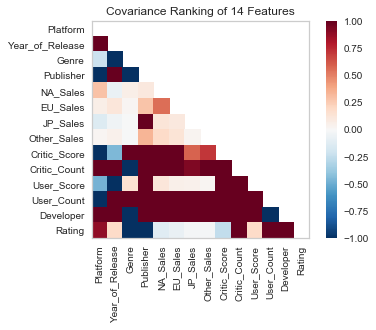

In [590]:
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

Split dataset to test set and training set

In [591]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

Feature Scaling

In [592]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

Create a linear regression model with all features

In [593]:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression.fit(X_train, y_train)
math.sqrt(mean_squared_error(y_test, LinearRegression.predict(X_test)))

0.006061894525505141

Select features

In [594]:
X = dataset1.drop(['Global_Sales','Other_Sales','JP_Sales','EU_Sales','Developer','Critic_Score','Publisher'], axis=1)
X

,Platform,Year_of_Release,Genre,NA_Sales,Critic_Count,User_Score,User_Count,Rating
0,12,2006.0,10,41.36,51.0,8.0,322.0,1
2,12,2008.0,6,15.68,73.0,8.3,709.0,1
3,12,2009.0,10,15.61,73.0,8.0,192.0,1
6,2,2006.0,4,11.28,65.0,8.5,431.0,1
7,12,2006.0,3,13.96,41.0,6.6,129.0,1
8,12,2009.0,4,14.44,80.0,8.4,594.0,1
11,2,2005.0,6,9.71,64.0,8.6,464.0,1
13,12,2007.0,10,8.92,63.0,7.7,146.0,1
14,14,2010.0,3,15.00,45.0,6.3,106.0,1
15,12,2009.0,10,9.01,33.0,7.4,52.0,1


Split dataset to training set and test set

In [595]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

Feature scalling

In [596]:
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

Linear Regression 

In [597]:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression.fit(X_train, y_train)
y_pred = LinearRegression.predict(X_test)
#RMSE
math.sqrt(mean_squared_error(y_test, y_pred))

0.5634081650276095

Random Forest Regressor

In [598]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred1 = regressor.predict(X_test) 
RandomF = math.sqrt(mean_squared_error(y_test, y_pred1))
RandomF

C:\Users\kexu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.5054147093648769

SVR

In [599]:
from sklearn.svm import SVR
clf = SVR(C=30.0, epsilon=0.1)
clf.fit(X_train,y_train)
y_pred3 = clf.predict(X_test)
SVR1 = math.sqrt(mean_squared_error(y_test, y_pred3))
SVR1

C:\Users\kexu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5465786343391681

Gradient Boosting Regressor with different parameters

In [600]:
from sklearn import ensemble
n_estimators = [100, 200, 300, 400, 500, 600, 900, 1000]
max_depth = [2, 3, 4, 5, 6,7, 9, 10]
min_samples_split = [2, 3, 4, 5, 6,7, 8, 9]
for i in range(len(n_estimators)):
    params = {'n_estimators': n_estimators[i], 'max_depth': max_depth[i], 'min_samples_split': min_samples_split[i],
              'learning_rate': 0.01, 'loss': 'ls'}
    clf = ensemble.GradientBoostingRegressor(**params)
    clf.fit(X_train, y_train)
    print(mean_squared_error(y_test, clf.predict(X_test)))


C:\Users\kexu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6531619316975892
0.28648314533365615
0.21929689064156976
0.23673354587362577
0.23239218952734703
0.23796946563103122
0.2563582890149717
0.2866895032999943


KNN Regressor

In [601]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(X_train, y_train)
knn = mean_squared_error(y_test, neigh.predict(X_test))
knn

0.3989775546875

Ridge

In [602]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=750)
Ridge.fit(X_train,y_train)
mean_squared_error(y_test, Ridge.predict(X_test))

0.2767321047389669

Lasso

In [603]:
Alpha = [0.1, 0.12, 0.15, 0.18, 0.20, 0.22, 0.23, 0.25]
for i in Alpha:
    from sklearn.linear_model import Lasso
    lasso = Lasso(alpha = i)
    lasso.fit(X_train,y_train)
    print(mean_squared_error(y_test, lasso.predict(X_test)))

0.30297116878396524
0.2995542118095076
0.29547889694539975
0.29266372679838615
0.2914870270987629
0.29087039171784823
0.29077209814690663
0.29099555924405485


Prediction Error Lasso

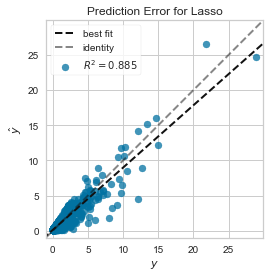

In [604]:
from sklearn.linear_model import Lasso

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
lasso = Lasso(alpha=0.23)
visualizer = PredictionError(lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(np.array(X_test), np.array(y_test))  # Evaluate the model on the test data
g = visualizer.poof()   

Prediction Error of SVR

C:\Users\kexu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


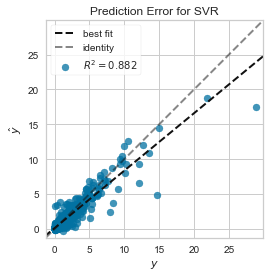

In [605]:
from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
clf = SVR(C=35.0, epsilon=0.1)
visualizer = PredictionError(clf)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(np.array(X_test), np.array(y_test))  # Evaluate the model on the test data
g = visualizer.poof()   

Prediction Error of Gradient Boosting Regressor

C:\Users\kexu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


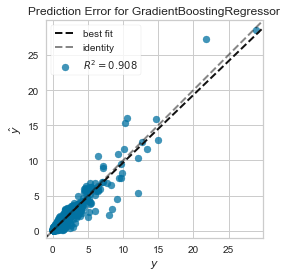

In [608]:
from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
params = {'n_estimators':500, 'max_depth': 6, 'min_samples_split': 6,
              'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
visualizer = PredictionError(clf)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(np.array(X_test), np.array(y_test))  # Evaluate the model on the test data
g = visualizer.poof()   